# Read, clean, and validate

## DataFrames and Series

### 2. Using data to answer questions

As a first example, we'll start with a simple question: what is the average birth weight of babies in the United States? To answer a question like this, we have to find an appropriate dataset or run an experiment to collect it. Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.

### 3. National Survey of Family Growth (NSFG)

For this question we'll use data from the National Survey of Family Growth, which is available from the National Center for Health Statistics. The 2013-2015 dataset includes information about a representative sample of women in the U.S. and their children.

### 4. Reading data

The Python module we'll use to read and analyze data is Pandas, which we'll import as `pd`. Pandas can read data in most common formats, including CSV, Excel, and the format the NSFG data is in, HDF5. The result from read_hdf() is a DataFrame, which is the primary data structure Pandas uses to store data.

In [2]:
import pandas as pd
nsfg = pd.read_hdf("data/nsfg.hdf5","nsfg")
type(nsfg)

pandas.core.frame.DataFrame

### 5. Reading data

head() shows the first 5 rows of the DataFrame, which contains one row for each pregnancy for each of the women who participated in the survey, and one column for each variable.

In [3]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


### 6. Columns and rows

The DataFrame has an attribute called shape, which is the number of rows and columns; there are 9358 rows in this dataset, one for each pregnancy, and 10 columns, one for each variable. The DataFrame also has an attribute called `columns`, which is an Index. That's another Pandas data structure, similar to a list; in this case it's a list of variables names, which are strings. Based on the names, you might be able to guess what some of the variables are, but in general you have to read the documentation.

In [4]:
nsfg.shape

(9358, 10)

In [5]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

### 7. Columns and rows

This figure shows an entry from the codebook for birthwgt_lb1, which is the weight in pounds of the first baby from this pregnancy, for cases of live birth.

### 8. Each column is a Series

In many ways a DataFrame is like a Python dictionary, where the variable names are the keys and the columns are the values. You can select a column from a DataFrame using the bracket operator, with a string as the key. The result is a Series, which is another Pandas data structure. In this case the Series contains the birth weights, in pounds, of the live births (or in the case of multiple births, the first baby).

In [6]:
pounds = nsfg["birthwgt_lb1"]
type(pounds)

pandas.core.series.Series

### 9. Each column is a series

head() shows the first five values in the series, the name of the series, and the datatype; float64 means that these values are 64-bit floating-point numbers. Notice that one of the values is NaN, which stands for "Not a Number". NaN is a special value that can indicate invalid or missing data. In this example, the pregnancy did not end in live birth, so birth weight is inapplicable.

In [7]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

### 10. Let's start exploring!

Let's start exploring this data by working on some exercises.

## Exploring the NSFG data

<p>To get the number of rows and columns in a DataFrame, you can read its <code>shape</code> attribute.</p>
<p>To get the column names, you can read the <code>columns</code> attribute.  The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called <code>nsfg</code>.</p>

Calculate the number of rows and columns in the DataFrame <code>nsfg</code>.

In [8]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


## Clean and Validate

### 1. Clean and Validate

In the previous lesson, we read data from the National Survey of Family Growth and selected a column from a DataFrame. In this lesson, we'll check for errors and prepare the data for analysis.

### 2. Selecting columns

We'll use the same DataFrame we used in the previous lesson, nsfg, which contains one row for each pregnancy in the survey. I'll select the variable birthwgt_lb1, which contains the pound part of birth weight, and assign it to pounds. And birthwgt_oz1 contains the ounce part of birth weight, so I'll assign that to ounces.

In [9]:
pounds = nsfg["birthwgt_lb1"]
ounces = nsfg["birthwgt_oz1"]

### 3. Value counts

Before we do anything with this data, we have to validate it. One part of validation is confirming that we are interpreting the data correctly. We can use value_counts() to see what values appear in pounds and how many times each value appears. By default, the results are sorted with the most frequent value first, so I use sort_index() to sort them by value instead, with the lightest babies first and heaviest babies last. As we'd expect, the most frequent values are 6-8 pounds, but there are some very light babies, a few very heavy babies, and two values, 98, and 99, that indicate missing data.

In [10]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

### 4. Value counts

We can validate the results by comparing them to the codebook, which lists the values and their frequencies. The results here agree with the codebook, so we have some confidence that we are reading and interpreting the data correctly.
<br>

<img src="image/img.png">

### 5. Describe

Another way to validate the data is with describe(), which computes summary statistics like the mean, standard deviation, min, and max. Here are the results for pounds. count is the number of values. The minimum and maximum values are 0 and 99, and the 50th percentile, which is the median, is 7. The mean is about 8.05, but that doesn't mean much because it includes the special values 98 and 99. Before we can really compute the mean, we have to replace those values with NaN to represent missing data.

In [11]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

### 6. Replace

The replace() method does what we want; it takes a list of values we want to replace and the value we want to replace them with. np dot nan means we are getting the special value NaN from the NumPy library, which is imported as np. The result from replace() is a new Series, which I assign back to pounds. Remember that the mean of the original series was about 8 point 05 pounds. The mean of the new series is about 6 point 7 pounds. It makes a big difference when you remove a few 99-pound babies! Instead of making a new Series, you can call replace() with inplace=True, which modifies the existing Series "in place", that is, without making a copy. Here's what that looks like for ounces. Since we didn't make a new series, we don't have to assign it back to ounces.

In [12]:
import numpy as np
pounds = pounds.replace([98,99],np.nan)
pounds.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

In [13]:
ounces.replace([98,99],np.nan,inplace=True)

### 7. Arithmetic with Series

Now we want to combine pounds and ounces into a single Series that contains total birth weight. Arithmetic operators work with Series objects; so, to convert from ounces to pounds, we can divide by 16 (there are 16 ounces in a pound). Then we can add the two Series objects to get the total. Here are the results. The mean is about 7 point 1, which is a little more than what we got before we added in the ounces part. Now we're close to answering our original question, the average birth weight for babies in the U.S., but as we'll see in the next lesson, we're not there yet.

In [14]:
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

### 8. Let's practice!

Let's first practice what we learned in this video.

## Clean a variable

<p>In the NSFG dataset, the variable <code>'nbrnaliv'</code> records the number of babies born alive at the end of a pregnancy.</p>
<p>If you use <code>.value_counts()</code> to view the responses, you'll see that the value <code>8</code> appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question. </p>
<p>Your job in this exercise is to replace this value with <code>np.nan</code>. Recall from the video how Allen replaced the values <code>98</code> and <code>99</code> in the <code>ounces</code> column using the <code>.replace()</code> method:</p>
<pre><code>ounces.replace([98, 99], np.nan, inplace=True)
</code></pre>

In the <code>'nbrnaliv'</code> column, replace the value <code>8</code>, in place, with the special value <code>NaN</code>.

In [17]:
nsfg["nbrnaliv"].replace([8],np.nan,inplace=True)

Confirm that the value <code>8</code> no longer appears in this column by printing the values and their frequencies.

In [18]:
nsfg["nbrnaliv"].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

## Compute a variable

<p>For each pregnancy in the NSFG dataset, the variable <code>'agecon'</code> encodes the respondent's age at conception, and <code>'agepreg'</code> the respondent's age at the end of the pregnancy.</p>
<p>Both variables are recorded as integers with two implicit decimal places, so the value <code>2575</code> means that the respondent's age was <code>25.75</code>.</p>

In [19]:
nsfg["agecon"]

0       2000
1       2291
2       3241
3       3650
4       2191
        ... 
9353    1758
9354    1741
9355    2091
9356    3450
9357    3683
Name: agecon, Length: 9358, dtype: int64

Select <code>'agecon'</code> and <code>'agepreg'</code>, divide them by <code>100</code>, and assign them to the local variables <code>agecon</code> and <code>agepreg</code>.

In [20]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Filter and visualize

### 1. Filter and Visualize

Let's get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.?

### 2. Histogram

In the previous lesson, we used data from the NSFG to compute birth weight in pounds and we stored the result in a Series called birth_weight. Let's see what the distribution of those values looks like. We'll use the pyplot submodule from the matplotlib visualization library, which we import as plt. Pyplot provides hist(), which takes a Series and plots a histogram; that is, it shows the values and how often they appear. However, pyplot doesn't work with NaNs, so we have to use dropna(), which makes a new Series that contains only the valid values. The second argument, bins, tells hist to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin. hist() takes other arguments that specify the type and appearance of the histogram; you will have a chance to explore these options in the next exercise. To label the axes we'll use xlabel() and ylabel(), and finally, to display the plot, we'll use plt dot show().

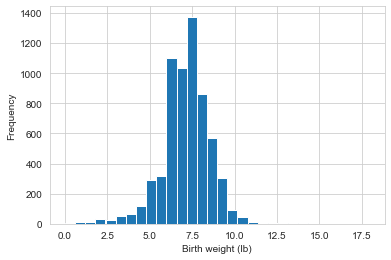

In [21]:
import matplotlib.pyplot as plt
plt.hist(birth_weight,bins=30)
plt.xlabel("Birth weight (lb)")
plt.ylabel("Frequency")
plt.show()

### 3. Histogram

And here's what the results look like. The x-axis is birth weight in pounds, divided into 30 bins. The y-axis is the number of births in each bin. The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies. That makes sense because the distribution includes some babies that were born preterm. The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

### 4. Boolean Series

To see which babies are preterm, we can use the prglngth column, which records pregnancy length in weeks. When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False. In this case, it's True for each preterm baby and False otherwise. We can use head() to see the first 5 elements.

In [22]:
preterm = nsfg["prglngth"] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

### 5. Boolean Series

If you compute the sum of a Boolean Series, it treats True as 1 and False as 0, so the sum is the number of Trues, which is the number of preterm babies, about 3700. If you compute the mean, you get the fraction of Trues; in this case, it's close to 0.4; that is, about 40% of the births in this dataset are preterm.

In [23]:
preterm.sum()

3742

In [24]:
preterm.mean()

0.39987176747168196

### 6. Filtering

We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criterion. For example, we can use preterm and the bracket operator to select values from birth_weight, so preterm_weight contains birth weights for preterm babies. To select full-term babies, we can use the tilde operator, which is "logical NOT" or inverse; it makes the Trues false and the Falses true. Not surprisingly, full term babies are heavier, on average, than preterm babies.

In [26]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [27]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

### 7. Filtering

If you have two Boolean Series, you can use logical operators to combine them; ampersand is the logical AND operator, and the vertical bar or pipe is logical OR.

### 8. Resampling

There's one more thing we have to do before we can answer our question: resampling. The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; they are "oversampled". Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. However, we can correct for oversampling by resampling. I won't get into the details here, but I have provided a function called resample_rows_weighted() that you can use for the exercises. If you are interested in learning more about resampling, check out DataCamp's statistics courses.

### 9. Finish it off!

Now we have everything we need to answer the motivating question. Let's get to it.

## Make a histogram

<p>Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.</p>
<p>As we saw in a previous exercise, the NSFG dataset includes a variable <code>'agecon'</code> that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the <code>bins</code> parameter that you saw in the video, and also a new parameter - <code>histtype</code> - which you can read more about <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank" rel="noopener noreferrer">here</a> in the <code>matplotlib</code> documentation. Learning how to read documentation is an essential skill. If you want to learn more about <code>matplotlib</code>, you can check out DataCamp's <a href="https://www.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib" target="_blank" rel="noopener noreferrer">Introduction to Data Visualization with Matplotlib</a> course.</p>

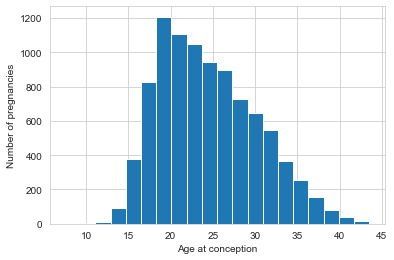

In [29]:
# Plot the histogram
plt.hist(agecon,bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

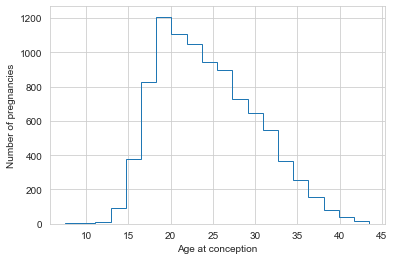

In [30]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype ='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## Compute birth weight

<p>Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.</p>
<p>I've provided a function, <code>resample_rows_weighted</code>, that takes the NSFG data and resamples it using the sampling weights in <code>wgt2013_2015</code>.  The result is a sample that is representative of the U.S. population.</p>
<p>Then I extract <code>birthwgt_lb1</code> and <code>birthwgt_oz1</code>, replace special codes with <code>NaN</code>, and compute total birth weight in pounds, <code>birth_weight</code>.</p>
<pre><code># Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16
</code></pre>

In [35]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [36]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

Make a Boolean Series called <code>full_term</code> that is true for babies with <code>'prglngth'</code> greater than or equal to 37 weeks.

In [37]:
full_term = nsfg["prglngth"] >= 37

Use <code>full_term</code> and <code>birth_weight</code> to select birth weight in pounds for full-term babies. Store the result in <code>full_term_weight</code>.

In [38]:
full_term_weight = birth_weight[full_term]

Compute the mean weight of full-term babies.

In [40]:
full_term_weight.mean()

7.392597951914515

## Filter

<p>In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.</p>
<p>The distribution of weight is also different for multiple births, like twins and triplets.  In this exercise, you'll filter them out, too, and see what effect it has on the mean.</p>

Use the variable <code>'nbrnaliv'</code> to make a Boolean Series that is <code>True</code> for single births (where <code>'nbrnaliv'</code> equals <code>1</code>) and <code>False</code> otherwise.

In [42]:
single = nsfg["nbrnaliv"] == 1

Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.

In [44]:
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

Single full-term mean: 7.40297320308299


For comparison, select multiple, full-term babies and compute their mean birth weight.

In [45]:
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Multiple full-term mean: 5.784722222222222


# Distributions

## Probability mass functions

### 1. Probability mass functions

In the previous chapter, we used histograms to visualize distributions. In this chapter, I'll present two more ways to represent distributions and you'll learn when to use each of them. And we'll work with a new dataset.

### 2. GSS

The General Social Survey, or GSS, has run annually since 1972; it surveys a representative sample of the adult population in the U.S. and asks questions about demographics and beliefs about social and political issues. It is widely used by politicians, policy makers, and researchers, including me.

### 3. Read the data

The GSS contains hundreds of variables; I've selected just a few. And I have already cleaned and validated them, so we just have to read the file, like this. If you run gss dot head(), you can see the first few rows.

In [46]:
gss =  pd.read_hdf("data/gss.hdf5","gss")
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


### 4. Histogram

To get started with this dataset, let's look at the distribution of educ, which records the number of years of education for each respondent. First I'll select a column from the DataFrame. We've already seen one way to visualize a distribution, a histogram. Here's the code that generates it, and here's the histogram for this variable. Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.

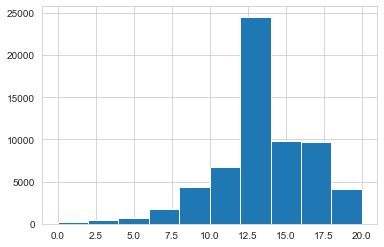

In [55]:
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

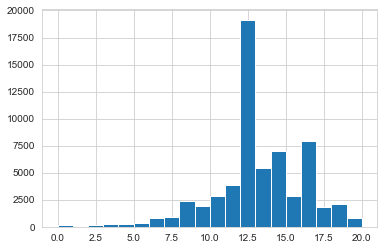

In [54]:
educ = gss['educ']
plt.hist(educ,label="educ",bins=sorted(educ.unique()))
plt.show()

### 5. PMF

An alternative is a probability mass function, or PMF, that contains the unique values in the dataset and how often each one appears. I've provided a class called Pmf that computes a probability mass function. This class is based on a Pandas Series and it provides some methods that aren't in Pandas. The first argument can be any kind of sequence; in this case, it's a Series object. The second argument indicates that we don't want to normalize this PMF. I'll explain what that means soon. The result is a Series that contains the values on the left and the counts on the right. In this dataset, there are 566 respondents who report that they have zero years of formal education.

### 6. PMF

You can use the bracket operator to look up a value in a Pmf and get a count. This example shows that there are 47689 respondents with 12 years of education, which is the most frequent value.

### 7. Normalize

Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting normalize=True; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1. Now if we use the bracket operator, the result is a fraction. In this example, the fraction of people with 12 years of education is 0.3086, a little more than 30%.

### 8. Plot

The Pmf class provides a bar() method that plots a PMF as a bar chart. And here's what it looks like. In this figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to two and four years of college.

### 9. Histogram vs. PMF

For this data, the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details. In this example, we can't see the peaks at 14 and 16 years.

### 10. Let's make some PMFs!

PMFs have limitations, too, as we'll see in the next lesson. But first, let's get some practice with PMFs.

## Make a PMF

<p>The GSS dataset has been pre-loaded for you into a DataFrame called <code>gss</code>.  You can explore it in the IPython Shell to get familiar with it. </p>
<p>In this exercise, you'll focus on one variable in this dataset, <code>'year'</code>, which represents the year each respondent was interviewed.</p>
<p>The <code>Pmf</code> class you saw in the video has already been created for you. You can access it outside of DataCamp via the <a href="https://pypi.org/project/empiricaldist/" target="_blank" rel="noopener noreferrer"><code>empiricaldist</code></a> library.</p>

Make a PMF for <code>year</code> with <code>normalize=False</code> and display the result.

## Plot a PMF

<p>Now let's plot a PMF for the age of the respondents in the GSS dataset.  The variable <code>'age'</code> contains respondents' age in years.</p>

Select the <code>'age'</code> column from the <code>gss</code> DataFrame and store the result in <code>age</code>.

## Cumulative distribution functions

### 1. Cumulative distribution functions

In the previous lesson, we saw the probability mass function, or PMF, which represents the possible values in a distribution and their probabilities. In this lesson, we'll see another way to represent a distribution, the cumulative distribution function, or CDF. CDFs are useful for some computations; they are also a great way to visualize and compare distributions.

### 2. From PMF to CDF

You might remember that a PMF tells you - if you draw a random value from a distribution - what's the chance of getting x, for any given value of x. The CDF is similar; if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.

### 3. Example

As a small example, suppose the distribution only has 5 elements, 1, 2, 2, 3, and 5. The PMF says that the probability of value 1 is 1/5; the probability of value 2 is 2/5, and the probabilities for 3 and 5 are 1/5. The CDF is the cumulative sum of the probabilities from the PMF. For example, the CDF of 2 is three fifths, because three out of 5 values in the distribution are less than or equal to 2. The CDF of 5 is 1, or 100%, because all of the values in the distribution are less than or equal to 5.

### 4. Make and plot a CDF

In the code for this course, I provide a Cdf class which is similar to the Pmf class we've seen. As a function, Cdf takes any kind of sequence and returns a new Cdf object. In this example, the sequence is the ages of respondents in the General Social Survey. The Cdf provides plot, which plots the CDF as a line. Here's what it looks like. The x-axis is the ages, from 18 to 89. The y-axis is the cumulative probabilities, from 0 to 1.

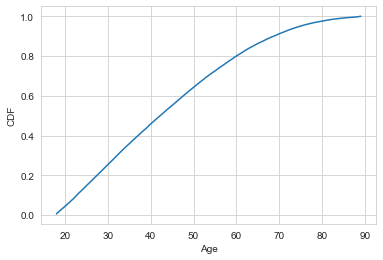

In [84]:
age = gss["age"]
freq = age.value_counts().sort_index()
pdf = freq /sum(freq)
cdf = pdf.cumsum()
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

### 5. Evaluating the CDF

The Cdf object can be used as a function, so if you give it an age, it returns the corresponding probability. In this example, the age is the quantity, q, which is 51. The corresponding probability is p, which is 0.66. That means that about 66% of the respondents are 51 years old or younger. The arrow in the figure shows how you could read this value from the CDF, at least approximately.

In [86]:
cdf[51]

0.6602013455146836

### 6. Evaluating the inverse CDF

The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. In this example, I look up the probability 0.25, which returns 30. That means that 25% of the respondents are age 30 or less. Another way to say the same thing is "age 30 is the 25th percentile of this distribution". I also look up probability 0.75, which returns 57, so 75% of the respondents are 57 or younger. Again, the arrows in the figure show how you could read these values from the CDF. By the way, the distance from the 25th to the 75th percentile is called the interquartile range, or IQR. It measures the spread of the distribution, so it is similar to standard deviation or variance. Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. So IQR can be more "robust" than variance, which means it works well even if there are errors in the data or extreme values.

In [135]:
print(cdf[(cdf <.26) & (cdf >=0.25)].index.values)

[30.]


In [137]:
print(cdf[(cdf >=.75) & (cdf < 0.76)].index.values)

[57.]


### 7. Let's practice!

In the next lesson, we'll use CDFs to compare distributions between groups. But first, you can practice making and plotting CDFs, and reading them forward and backward.

## Make a CDF

<p>In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.</p>
<p>The GSS dataset has been preloaded for you into a DataFrame called <code>gss</code>.</p>
<p>As with the <code>Pmf</code> class from the previous lesson, the <code>Cdf</code> class you just saw in the video has been created for you, and you can access it outside of DataCamp via the <a href="https://pypi.org/project/empiricaldist/" target="_blank" rel="noopener noreferrer"><code>empiricaldist</code></a> library.</p>

In [139]:
1 - cdf[30]

0.7460862863473612

## Compute IQR

<p>Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.</p>
<p>In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the <code>'realinc'</code> column, and the CDF of income has already been computed and stored in <code>cdf_income</code>.</p>

In [153]:
income = gss["realinc"]
freq   = income.value_counts().sort_index()
pdf_income = freq /sum(freq)
cdf_income = pdf_income.cumsum()

In [162]:
percentile_75th = cdf_income[(cdf_income  >= 0.75) & (cdf_income < .751)].index.values
percentile_75th

array([43426.])

In [163]:
percentile_25th = cdf_income[(cdf_income  >= 0.25) & (cdf_income < .251)].index.values
percentile_25th

array([13750.])

In [164]:
iqr = percentile_75th - percentile_25th
iqr

array([29676.])

## Plot a CDF

<p>The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.</p>
<p>In the GSS dataset, the variable <code>'realinc'</code> represents total household income, converted to 1986 dollars.  We can get a sense of the shape of this distribution by plotting the CDF.</p>

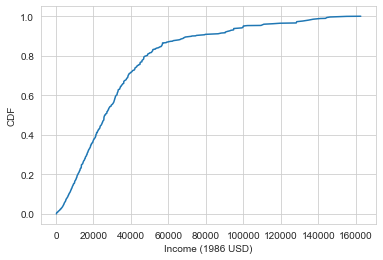

In [165]:
cdf_income.plot()
# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## Comparing distributions

### 1. Comparing distributions

So far we've seen two ways to represent distributions, PMFs and CDFs. In this lesson, we'll use PMFs and CDFs to compare distributions, and we'll see the pros and cons of each.

### 2. Multiple PMFs

One way to compare distributions is to plot multiple PMFs on the same axes. For example, suppose we want to compare the distribution of age for male and female respondents. First I'll create a boolean Series that's true for male respondents. And I'll extract the age column. Now I can select ages for the male and female respondents. And plot a Pmf for each. Of course I always remember to label the axes!

In [183]:
def pmf(data):
    freq = data.value_counts().sort_index()
    return freq/sum(freq)



def cdf(data):
    data_pmf = pmf(data)
    return data_pmf.cumsum()

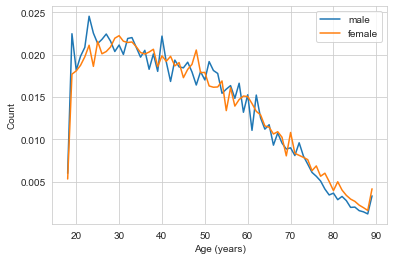

In [184]:
male = gss["sex"] == 1
male_age = age[male]
female_age = age[~male]
pmf(male_age).plot(label="male")
pmf(female_age).plot(label="female")
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

### 3. Age PMFs

Here's the result. It looks like there are more men in their twenties, maybe. And there are more women in their 70s and 80s. In between, the plot is pretty noisy; most of these differences are just random variations.

### 4. Multiple CDFs

We can do the same thing with CDFs. Here's the code: everything is the same except I replaced Pmf with Cdf.

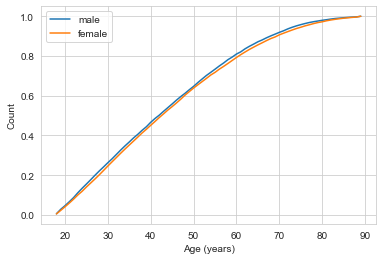

In [185]:
cdf(male_age).plot(label="male")
cdf(female_age).plot(label="female")
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [191]:
male_age.describe()

count    28585.000000
mean        44.181984
std         16.897798
min         18.000000
25%         30.000000
50%         42.000000
75%         57.000000
max         89.000000
Name: age, dtype: float64

In [192]:
female_age.describe()

count    33696.000000
mean        45.043922
std         17.209189
min         18.000000
25%         31.000000
50%         43.000000
75%         58.000000
max         89.000000
Name: age, dtype: float64

### 5. Age CDFs

And here is the result. In general, CDFs are smoother than PMFs. Because they smooth out randomness, we can often get a better view of real differences between distributions. In this case, the lines overlap over the whole range; that is, the distributions are nearly identical. But we can see the blue line to the left of the orange line across the distribution, which shows that men are younger at every percentile. Or, another way to think of it: for every age, the fraction of men below that age is more than the fraction of women below that age. But not by very much.

### 6. Income distribution

As another example, let's look at household income and compare the distribution before and after 1995 (I chose 1995 because it's roughly the midpoint of the survey). The variable realinc represents household income in 1986 dollars. I'll make a boolean Series to select respondents interviewed before 1995. Now I can plot the PMFs. And label the axes.

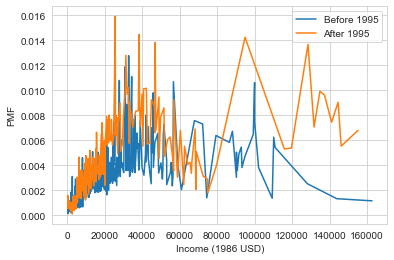

In [188]:
income = gss["realinc"]
pre95 = gss["year"] < 1995
pmf(income[pre95]).plot(label="Before 1995")
pmf(income[~pre95]).plot(label ="After 1995")
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

### 7. Income PMFs

Here's what it looks like. There are a lot of unique values in this distribution, and none of them appear very often. The PMF is so noisy, we can't really see the shape of the distribution. It looks like there are more people with high incomes after 1995, but it's hard to tell. We can get a clearer picture with a CDF.

### 8. Income CDFs

Here's the code to generate the CDFs.

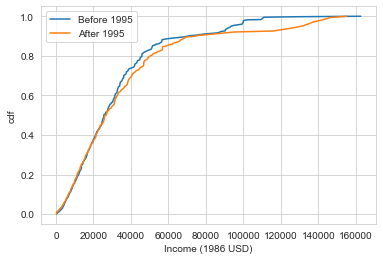

In [190]:
cdf(income[pre95]).plot(label="Before 1995")
cdf(income[~pre95]).plot(label ="After 1995")
plt.xlabel('Income (1986 USD)')
plt.ylabel('cdf')
plt.legend()
plt.show()

In [193]:
# after 1995
income[~pre95].describe()

count     26200.000000
mean      37025.501819
std       34774.999062
min         234.000000
25%       13501.875000
50%       26950.000000
75%       46800.000000
max      155139.973100
Name: realinc, dtype: float64

In [194]:
# before 1995
income[pre95].describe()

count     29299.000000
mean      32625.073347
std       26283.076814
min         382.000000
25%       14015.000000
50%       25619.000000
75%       42020.000000
max      162607.000000
Name: realinc, dtype: float64

### 9. Income CDFs

And here are the results. Below $30,000 the CDFs are almost identical; above that, we can see that the orange distribution is shifted to the right. In other words, the fraction of people with high incomes is about the same, but the income of high earners has increased.

### 10. Let's practice!

In general, I recommend CDFs for exploratory analysis. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two. In the exercises for this lesson, you'll have a chance to compare incomes for respondents with different education levels.

## Extract education levels

<p>Let's create Boolean Series to identify respondents with different levels of education.</p>
<p>In the U.S, 12 years of education usually means the respondent has completed high school (secondary education).  A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).</p>

In [195]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >=14) & (educ <16)

# High school (12 or fewer years of education)
high = (educ <=12)
print(high.mean())

0.5308807991547402


## Plot income CDFs

<p>Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:</p>
<pre><code>Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')
</code></pre>
<p>You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: <code>high</code>, <code>assc</code>, and <code>bach</code>.</p>

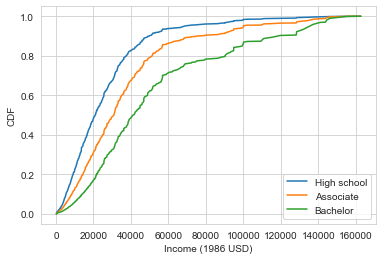

In [196]:
income = gss['realinc']

# Plot the CDFs
cdf(income[high]).plot(label='High school')
cdf(income[assc]).plot(label='Associate')
cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

## Modeling distributions

### 1. Modeling distributions

In the previous lesson we used PMFs and CDFs to plot and compare distributions. We saw that PMFs don't work very well when the data have a large number of unique values. In this lesson you'll learn about probability density functions, or PDFs, and learn how to estimate PDFs from data.

### 2. The normal distribution

Let's start with the normal distribution, also called the Gaussian distribution. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. To get a sense of what the normal distribution looks like, I'll use the NumPy random module to generate 1000 random values from a normal distribution. And plot their CDF. This sigmoid shape is what we expect to see with values from a normal distribution.

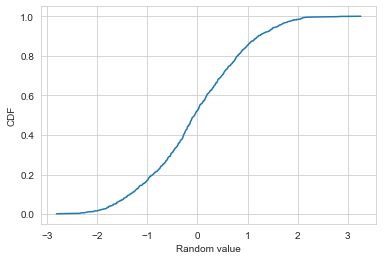

In [199]:
sample = np.random.normal(size=1000)
cdf(pd.Series(sample)).plot()
plt.xlabel("Random value")
plt.ylabel("CDF")
plt.show()

### 3. The normal CDF

SciPy provides an object called norm that represents the normal distribution. I'll use np dot linspace() to create an array of equally-spaced points from -3 to 3. norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation 1. Dot cdf() evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.

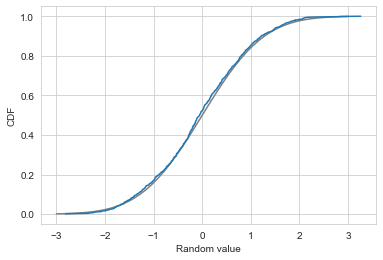

In [201]:
from scipy.stats import norm

xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs)

plt.plot(xs,ys,color = "grey")
cdf(pd.Series(sample)).plot()
plt.xlabel("Random value")
plt.ylabel("CDF")
plt.show()

### 4. Comparing CDFs

Here's the result. The CDF from the sample is pretty close to the normal CDF over the whole range. If this were real data, we would conclude that the normal distribution is a good model for the data.

### 5. The bell curve

The norm object also provides dot pdf(), which evaluates the probability density function, or PDF. And here's what that looks like. It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

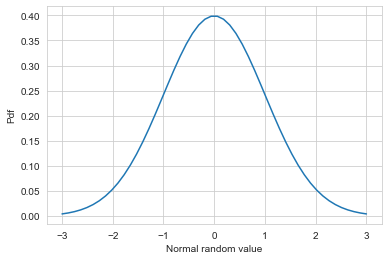

In [203]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs,ys)
plt.xlabel("Normal random value")
plt.ylabel("Pdf")
plt.show()

### 6. Sample PMF

Here's what it looks like. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

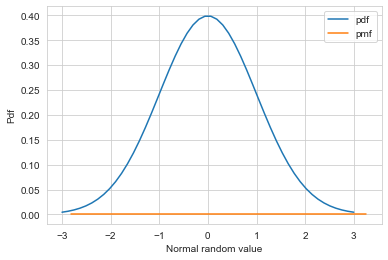

In [205]:
plt.plot(xs,ys,label="pdf")
pmf(pd.Series(sample)).plot(label="pmf")
plt.xlabel("Normal random value")
plt.ylabel("Pdf")
plt.legend()
plt.show()

### 7. KDE plot

To generate a KDE plot, we'll use the Seaborn library for data visualization, which I import as sns. Seaborn provides kdeplot, which takes the sample, estimates the PDF, and plots it. Here's what it looks like.

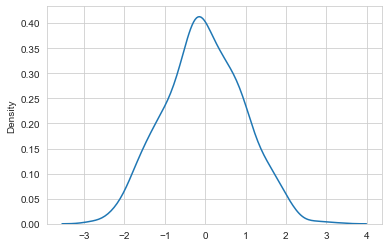

In [207]:
import seaborn as sns
sns.kdeplot(sample)
plt.show()

### 8. KDE and PDF

Now we can compare the KDE plot and the normal PDF. Here's the code. There's nothing there we haven't already seen. And here's the result. The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

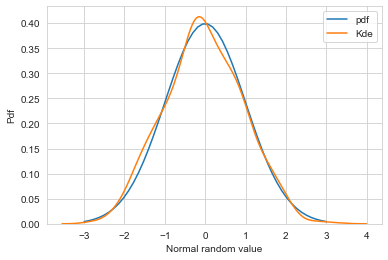

In [208]:
plt.plot(xs,ys,label="pdf")
sns.kdeplot(sample,label="Kde")
plt.xlabel("Normal random value")
plt.ylabel("Pdf")
plt.legend()
plt.show()

### 9. PMF, CDF, KDE

To summarize, we've seen three ways to visualize distributions, PMFs, CDFs, and KDE. In general, I use CDFs when I am exploring data. I think they give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. If I am presenting results to an audience unfamiliar with CDFs, I'll use a PMF for distributions with a small number of unique values and KDE if there are a lot of values.

### 10. Let's practice!

Now let's practice what we learned in this lesson.

## Distribution of income

<p>In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution.  We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's <code>np.log10()</code> function.</p>
<p>Then, you'll use the computed mean and standard deviation to make a <code>norm</code> object using the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html" target="_blank" rel="noopener noreferrer"><code>scipy.stats.norm()</code></a> function.</p>

In [209]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

4.371148677933652 0.4290082383271419


## Comparing CDFs

<p>To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:</p>
<pre><code># Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)
</code></pre>
<p><code>dist</code> is a <code>scipy.stats.norm</code> object with the same mean and standard deviation as the data. It provides <code>.cdf()</code>, which evaluates the normal cumulative distribution function.</p>
<p>Be careful with capitalization:  <code>Cdf()</code>, with an uppercase <code>C</code>, creates <code>Cdf</code> objects.  <code>dist.cdf()</code>, with a lowercase <code>c</code>, evaluates the normal cumulative distribution function.</p>

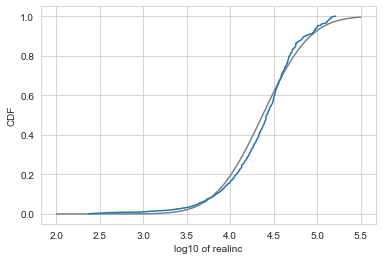

In [210]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
cdf(log_income).plot()

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

## Comparing PDFs

<p>In the previous exercise, we used CDFs to see if the distribution of income is lognormal.  We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!</p>
<p>As before, the <code>norm</code> object <code>dist</code> is available in your workspace:</p>
<pre><code>from scipy.stats import norm
dist = norm(mean, std)
</code></pre>
<p>Just as all <code>norm</code> objects have a <code>.cdf()</code> method, they also have a <code>.pdf()</code> method.</p>
<p>To create a KDE plot, you can use Seaborn's <a href="https://seaborn.pydata.org/generated/seaborn.kdeplot.html" target="_blank" rel="noopener noreferrer"><code>kdeplot()</code></a> function. Here, Seaborn has been imported for you as <code>sns</code>.</p>

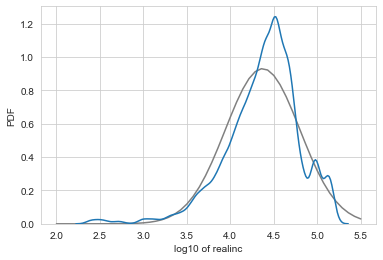

In [211]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

# Relationships

## Exploring relationships

### 1. Exploring relationships

So far we have only looked at one variable at a time. Now it's time to explore relationships between variables.

### 2. Height and weight

As a first example, we'll look at the relationship between height and weight. I'll use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

### 3. Scatter plot

A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right. To demonstrate, I'll load the BRFSS dataset and extract the variables for height in centimeters and weight in kilograms. pyplot provides a scatter() function that makes a scatter plot, but it is more versatile than we need and slower than we want. It is faster to use plot() with the format string 'o', which plots a circle for each data point. And, as always, we have to label the axes.

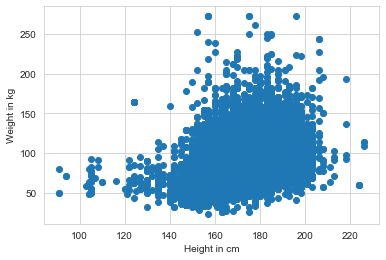

In [212]:
brfss =  pd.read_hdf("data/brfss.hdf5","brfss")
height = brfss["HTM4"]
weight = brfss["WTKG3"]
plt.plot(height,weight,"o")
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### 4. Overplotting

Here's what it looks like. In general, it looks like taller people are heavier, but there are a few things about this scatter plot that make it hard to interpret. Most importantly, it is "overplotted", which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

### 5. Transparency

One way to improve it is to use transparency, which we can do with the alpha parameter. The lower the value of alpha, the more transparent each data point is. Here's what it looks like with alpha=0.02. This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

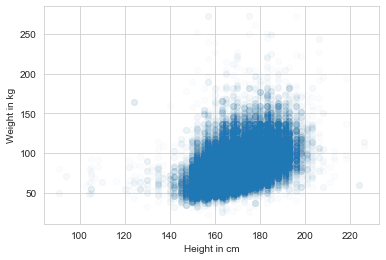

In [213]:
plt.plot(height,weight,"o",alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


### 6. Marker size

With markersize=1 and a low value of alpha, the scatter plot is less saturated. Here's what it looks like. Again, this is better, but now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

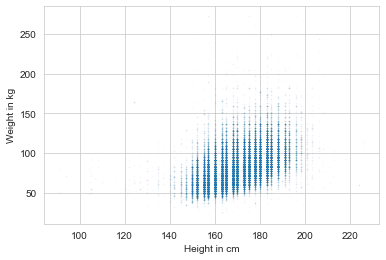

In [216]:
plt.plot(height,weight,"o",alpha=.02,markersize=1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


### 7. Jittering

Adding random noise like this is called "jittering". In this example, I added noise with mean 0 and standard deviation 2. Here's what the plot looks like when we jitter height. The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by jittering weight, too.

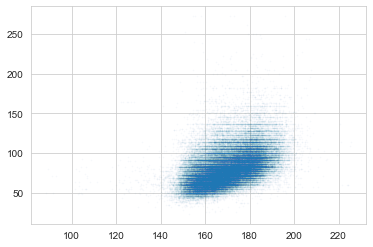

In [217]:
height_jitter = height + np.random.normal(0,2,size=len(height))
plt.plot(height_jitter,weight,"o",markersize=1,alpha=0.02)
plt.show()

### 8. More jittering

Here's the code. And here's the result. Finally, let's zoom in on the area where most of the data points are.

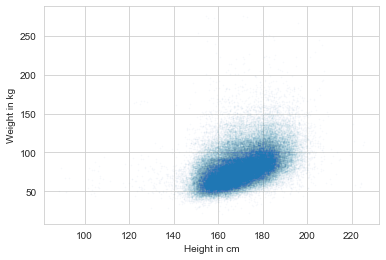

In [218]:
weight_jitter = weight + np.random.normal(0,2,size=len(weight))
plt.plot(height_jitter,weight_jitter,"o",alpha=0.02,markersize = 1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### 9. Zoom

The pyplot function axis() sets the lower and upper bounds for the x- and y-axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms. Here's what it looks like. Finally, we have a reliable picture of the relationship between height and weight.

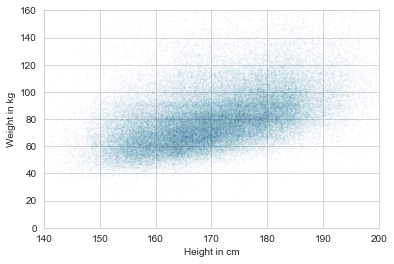

In [219]:
plt.plot(height_jitter,weight_jitter,"o",alpha=0.02,markersize = 1)
plt.axis([140,200,0,160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### 10. Before and after

Here's the plot we started with and the one we ended with. Clearly, they are very different, and they suggest different stories about the relationship between these variables. The point of this example is that it takes some effort to make an effective scatter plot.

### 11. Let's explore!

In the next lesson we'll see other ways to visualize relationships between variables, but first you'll have a chance to explore the relationship between age and weight.

## PMF of age

<p>Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a <code>.bar()</code> method to make a bar chart.</p>
<p>The BRFSS dataset includes a variable, <code>'AGE'</code> (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. <code>'AGE'</code> contains the midpoint of the bins.</p>

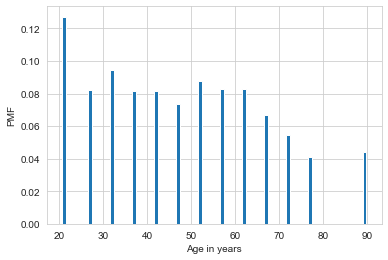

In [226]:
age = brfss["AGE"]
pmf_age = pmf(age)
plt.bar(pmf_age.index,pmf_age.values)
plt.xlabel("Age in years")
plt.ylabel("PMF")
plt.show()

## Scatter plot

<p>Now let's make a scatterplot of <code>weight</code> versus <code>age</code>. To make the code run faster, I've selected only the first 1000 rows from the <code>brfss</code> DataFrame.</p>
<p><code>weight</code> and <code>age</code> have already been extracted for you. Your job is to use <code>plt.plot()</code> to make a scatter plot.</p>

Make a scatter plot of <code>weight</code> and <code>age</code> with format string <code>'o'</code> and <code>alpha=0.1</code>.

In [231]:
brfss = brfss[:1000]
age = brfss["AGE"]
weight = brfss["WTKG3"]

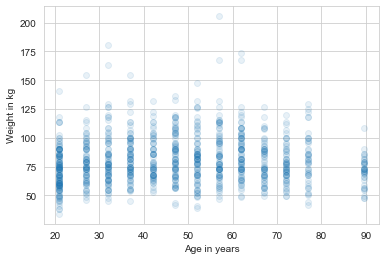

In [232]:
plt.plot(age,weight,"o",alpha=0.1)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

## Jittering

<p>In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered <code>height</code> and <code>weight</code> in the video:</p>
<pre><code>height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
</code></pre>

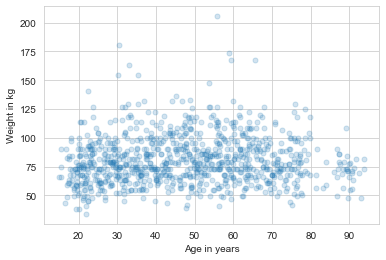

In [234]:
# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2.5,size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,"o",alpha=0.2,markersize=5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

## Visualizing relationships

### 1. Visualizing relationships

In the previous lesson we used scatter plots to visualize relationships between variables, and in the exercise, you explored the relationship between age and weight. In this lesson, we'll see other ways to visualize these relationships, including boxplots and violin plots.

### 2. Weight and age

In the previous exercises, you made a scatter plot of weight versus age. Your code probably looked like this. And the results looked like this. It looks like older people might be heavier, but it is hard to see clearly.

### 3. More data

For the exercises, you worked with a small subset of the data. Now let's see what it looks like with more data. Here's the code. And here's the plot. I made a few changes in the code: * First, I reduced the marker size, because we have more data now, * Second, I jittered the weights, so the horizontal rows are not visible. * I jitter the ages, too, but less than in the exercise, so the data points are spread out, but there's still space between the columns. That makes it possible to see the shape of the distribution in each age group, and the differences between groups. If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it.

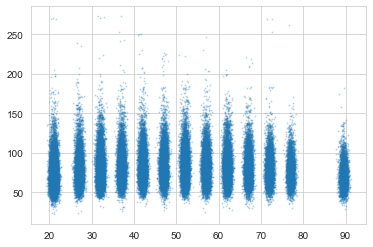

In [236]:
brfss = pd.read_hdf("data/brfss.hdf5","brfss")
age = brfss['AGE'] + np.random.normal(0,0.5,size = len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0,2,size = len(brfss))
plt.plot(age,weight,"o",markersize =1,alpha =0.2)
plt.show()

### 4. Violin plot

And there's a name for that; it's called a violin plot. Seaborn provides a function that makes violin plots, but before we can use it, we have to get rid of any rows with missing data. Here's how. dropna() creates a new DataFrame that contains the rows from brfss where AGE and WTKG3 are not NaN. Now we can call violinplot(). The x and y parameters mean we want AGE on the x-axis and WTKG3 on the y-axis. data is the DataFrame we just created, which contains the variables we're going to plot. The parameter inner=None simplifies the plot a little. Here's what it looks like. Each column is a graphical representation of the distribution of weight in one age group. The width of these shapes is proportional to the estimated density, so it's like two vertical PDFs plotted back to back, and filled in with nice colors. There's one other way to look at data like this, called a box plot.

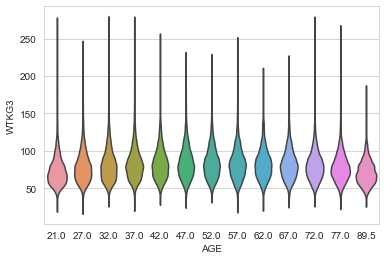

In [238]:
data = brfss.dropna(subset=["AGE","WTKG3"])
sns.violinplot(x="AGE",y="WTKG3",data= data ,inner= None)
plt.show()

### 5. Box plot

The code to generate a box plot is very similar. I put in the parameter whis=10 to turn off a feature we don't need. If you are curious about it, you can read the documentation or check out DataCamp's Seaborn courses. Here's what it looks like. Each box represents the interquartile range, or IQR, from the 25th to the 75th percentile. The line in the middle of each box is the median. The spines sticking out of the top and bottom show the minimum and maximum values. In my opinion, this plot gives us the best view of the relationship between weight and age. Looking at the medians, it seems like people in their 40s are the heaviest; younger and older people are lighter. Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too. These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

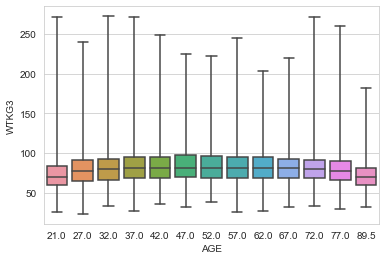

In [240]:
sns.boxplot(x="AGE",y="WTKG3",data=data ,whis=10)
plt.show()


### 6. Log scale

For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with the pyplot function yscale(). Here's what it looks like. To show the relationship between age and weight most clearly, this is probably the figure I would use.

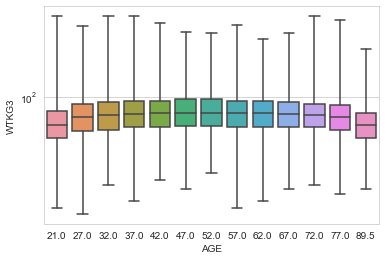

In [241]:
sns.boxplot(x="AGE",y="WTKG3",data=data ,whis=10)
plt.yscale("log")
plt.show()

### 7. Let's practice!

Now let's get some practice with violin and box plots.

## Height and weight

<p>Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier.  Now let's take a closer look using a box plot. The <code>brfss</code> DataFrame contains a variable <code>'_HTMG10'</code> that represents height in centimeters, binned into 10 cm groups.</p>
<p>Recall how Allen created the box plot of <code>'AGE'</code> and <code>'WTKG3'</code> in the video, with the y-axis on a logarithmic scale:</p>
<pre><code>sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
</code></pre>

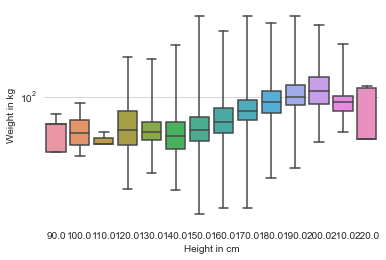

In [242]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x="_HTMG10",y="WTKG3",data = data,whis =10 )

# Plot the y-axis on a log scale
plt.yscale("log")

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


## Distribution of income

<p>In the next two exercises we'll look at relationships between income and other variables.  In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories.  The variable name is <code>'INCOME2'</code>.  Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all <code>Pmf</code> objects have a <code>.bar()</code> method.</p>

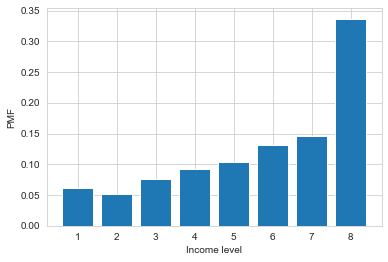

In [243]:
# Extract income
income = brfss["INCOME2"]

# Plot the PMF
pmf_income = pmf(income)
plt.bar(pmf_income.index,pmf_income.values)

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

## Income and height

<p>Let's now use a violin plot to visualize the relationship between income and height.</p>

Create a violin plot to plot the distribution of height (<code>'HTM4'</code>) in each income (<code>'INCOME2'</code>) group. Specify <code>inner=None</code> to simplify the plot.

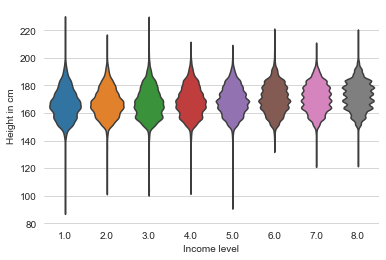

In [245]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x="INCOME2",y="HTM4",data=data,inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


## Correlation

### 1. Correlation

In the previous lesson, we visualized relationships between pairs of variables. In this lesson we'll learn about the coefficient of correlation, which quantifies the strength of these relationships.

### 2. Correlation coefficient

When people say "correlation" casually, they might mean any relationship between two variables. In statistics, it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables. To demonstrate, I'll select three columns from the BRFSS dataset, like this. The result is a DataFrame with just those columns. Now we can use the corr() method, like this.

In [246]:
columns=['HTM4','WTKG3','AGE']
subset = brfss[columns]

### 3. Correlation matrix

The result is a "correlation matrix". Reading across the first row, the correlation of HTM4 with itself is 1. That's expected; the correlation of anything with itself is 1. The next entry is more interesting; the correlation of height and weight is about 0 point 47. It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. If you know someone's height, you can make a better guess about their weight, and vice versa. The correlation between height and age is about -0 point 09. It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height. The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?

In [247]:
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


### 4. Weight and age

Remember that the relationship between weight and age looks like this. People in their 40s are the heaviest; younger and older people are lighter. So this relationship is nonlinear.

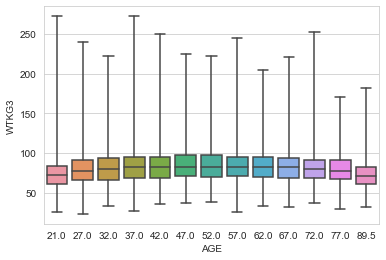

In [248]:
sns.boxplot(x="AGE",y="WTKG3",data=data ,whis=10)
plt.show()

### 5. Nonlinear relationships

But correlation only works for linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is. To demonstrate, I'll generate some fake data: xs contains equally-spaced points between -1 and 1. ys is xs squared plus some random noise. Here's the scatter plot of xs and ys. It's clear that this is a strong relationship; if you are given `x`, you can make a much better guess about y. But here's the correlation matrix; the computed correlation is close to 0. In general, if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship. This is one of the reasons I think correlation is not such a great statistic.

In [249]:
xs = np.linspace(-1,1)
ys = xs**2
ys += np.random.normal(0,0.05,len(xs))
np.corrcoef(xs,ys)

array([[ 1.        , -0.02682705],
       [-0.02682705,  1.        ]])

### 6. You keep using that word

There's another reason to be careful with correlation; it doesn't mean what people take it to mean. Specifically, correlation says nothing about slope. If we say that two variables are correlated, that means we can use one to predict the other. But that might not be what we care about.

### 7. Strength of relationship

For example, suppose we are concerned about the health effects of weight gain, so we plot weight versus age, from 20 to 50 years old. Here are two fake datasets I generated. The one on the left has higher correlation, about 0 point 76 compared to 0 point 47. But on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this scenario, the relationship on the right is probably more important, even though the correlation is lower. The statistic we really care about is the slope of the line.

### 8. Let's practice!

In the next lesson, you'll learn how to estimate that slope. But first, let's practice with correlation.

## Computing correlations

<p>The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable <code>'_VEGESU1'</code> represents the number of servings of vegetables respondents reported eating per day.</p>
<p>Let's see how this variable relates to age and income.</p>

In [250]:
# Select columns
columns = ["AGE","INCOME2","_VEGESU1"]
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


## Simple regression

### 1. Simple regression

In the previous lesson we saw that correlation does not always measure what we really want to know. In this lesson, we look at an alternative - simple linear regression.

### 2. Strength of relationship

Let's look again at an example from the previous lesson, a hypothetical relationship between weight and age. I generated two fake datasets to make a point: The one on the left has higher correlation, about 0 point 76 compared to 0 point 48. But in the one on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this context, the statistic we probably care about is the slope of the line, not the correlation coefficient.

### 3. Strength of effect

To estimate the slope of the line, we can use linregress() from the SciPy stats module. The result is a LinRegressResult object that contains five values: slope is the slope of the line of best fit for the data; intercept is the intercept. For Hypothetical #1, the estimated slope is about 0.019 kilograms per year or about 0.6 kilograms over the 30-year range.

### 4. Strength of effect

Here are the results for Hypothetical #2. The estimated slope is about 10 times higher: about 0 point 18 kilograms per year or 6 kilograms per 30 years, What's called rvalue here is correlation, which confirms what we saw before; the first example has higher correlation, about 0 point 76 compared to 0 point 48. But the strength of the effect, as measured by the slope of the line, is about 10 times higher in the second example.

### 5. Regression lines

We can use the results from linregress() to compute the line of best fit: first we get the min and max of the observed xs; then we multiply by the slope and add the intercept. And plot the line. Here's what that looks like for the first example. And the same thing for the second example. The visualization here might be misleading unless you look closely at the vertical scales; the slope on the right is almost 10 times higher.

### 6. Height and weight

Now let's look at an example with real data. Here's the scatter plot of height and weight again, from Lesson 1.

### 7. Regression line

Now we can compute the regression line. linregress() can't handle NaNs, so we have to use dropna() to remove rows that are missing the data we need. Now we can compute the linear regression. And here are the results. The slope is about 0 point 9 kilograms per centimeter, which means that we expect a person one centimeter taller to be almost a kilogram heavier. That's quite a lot.

In [269]:
from scipy.stats import linregress

subset = brfss.dropna(subset=["WTKG3","HTM4"])
xs = subset["HTM4"]
ys = subset["WTKG3"]
res = linregress(xs,ys)
res


LinregressResult(slope=0.9192115381848179, intercept=-75.12704250330034, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802921, intercept_stderr=0.9608860265433051)

### 8. Line of best fit

As before, we can compute the line of best fit and plot it. And here's what that looks like. The slope of this line seems consistent with the scatter plot.

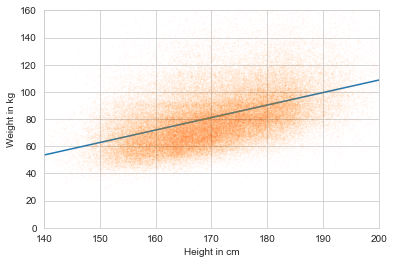

In [270]:
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx,fy,"-")
plt.plot(height_jitter,weight_jitter,"o",alpha=0.02,markersize = 1)
plt.axis([140,200,0,160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### 9. Linear relationships

However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship. Here's the scatter plot of weight versus age, which you saw in a previous exercise. People in their 40s are the heaviest; younger and older people are lighter. So the relationship is nonlinear.

In [271]:
subset = brfss.dropna(subset=["WTKG3","AGE"])
xs = subset["AGE"]
ys = subset["WTKG3"]

res = linregress(xs,ys)


### 10. Nonlinear relationships

If we don't look at the scatter plot and blindly compute the regression line, here's what we get. The estimated slope is only 0 point 02 kilograms per year, or 0 point 6 kilograms in 30 years.

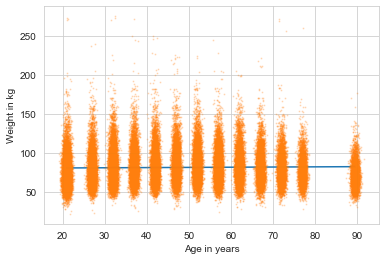

In [272]:
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx,fy,"-")
age = xs + np.random.normal(0,0.5,size = len(subset))
weight = ys + np.random.normal(0,2,size = len(subset))
plt.plot(age,weight,"o",markersize =1,alpha =0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

### 11. Not a good fit

And here's what the line of best fit looks like. A straight line does not capture the relationship between these variables well.

### 12. Let's practice!

In the next lesson, we'll learn how to use multiple regression to estimate non-linear relationships. But first, let's practice simple regression.

## Income and vegetables

<p>As we saw in a previous exercise, the variable <code>'_VEGESU1'</code> represents the number of vegetable servings respondents reported eating per day.</p>
<p>Let's estimate the slope of the relationship between vegetable consumption and income.</p>

In [277]:

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])[:1000]
xs = subset["INCOME2"]
ys = subset["_VEGESU1"]

# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.07342239041594549, intercept=1.538768914395107, rvalue=0.12076972731060823, pvalue=0.00012902206204389567, stderr=0.01910357623189157, intercept_stderr=0.12059184510957136)


## Fit a line

<p>Continuing from the previous exercise:</p>
<ul>
<li><p>Assume that <code>xs</code> and <code>ys</code> contain income codes and daily vegetable consumption, respectively, and </p></li>
<li><p><code>res</code> contains the results of a simple linear regression of <code>ys</code> onto <code>xs</code>.</p></li>
</ul>
<p>Now, you're going to compute the line of best fit. NumPy has been imported for you as <code>np</code>.</p>

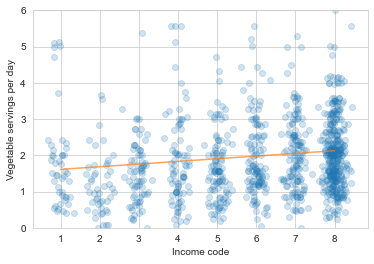

In [278]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

# Multivariate Thinking

## Limits of simple regression

### 1. Limits of simple regression

In this chapter we'll get farther into regression, including multiple regression and one of my all-time favorite tools, logistic regression. But first let's understand the limits of simple regression.

### 2. Income and vegetables

In a previous exercise, you made a scatter plot of vegetable consumption as a function of income, and plotted a line of best fit. Here's what it looks like (note that this version includes more data than you had for the exercise). The slope of the line is 0 point 07, which means that the difference between the lowest and highest income brackets is about 0 point 49 servings per day. So that's not a very big difference.

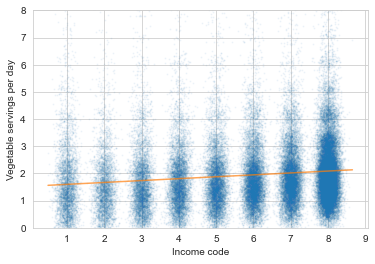

In [291]:
# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset["INCOME2"]
ys = subset["_VEGESU1"]

# Compute the linear regression
res = linregress(xs,ys)

# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
y_jitter = ys + np.random.normal(0,0.15,len(ys))
plt.plot(x_jitter, y_jitter, 'o', alpha=0.05,markersize=1)

# Plot the line of best fit
fx = np.array([x_jitter.min(),x_jitter.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0,8])
plt.show()

### 3. Vegetables and income

But it was an arbitrary choice to plot vegetables as a function of income. We could have plotted it the other way around, like this. The slope of this line is 0 point 23, which means that the difference between 0 and 8 servings per day is about 2 income codes, roughly from code 5 to code 7. If we check the codebook, income code 5 is about $30,000 per year; income code 7 is about $65,000. So if we use vegetable consumption to predict income, we see a big difference. But when we used income to predict vegetable consumption, we saw a small difference. This example shows that regression is not symmetric; the regression of A onto B is not the same as the regression of B onto A.

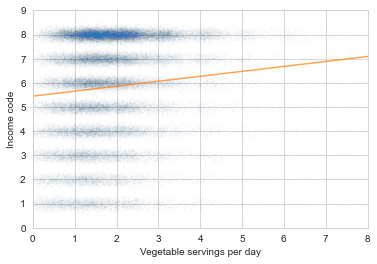

In [294]:
# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
ys = subset["INCOME2"]
xs = subset["_VEGESU1"]

# Compute the linear regression
res = linregress(xs,ys)

# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
y_jitter = ys + np.random.normal(0,0.15,len(ys))
plt.plot(x_jitter, y_jitter, 'o', alpha=0.01,markersize=1)

# Plot the line of best fit
fx = np.array([x_jitter.min(),x_jitter.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.ylabel('Income code')
plt.xlabel('Vegetable servings per day')
plt.xlim([0,8])
plt.ylim([0,9])
plt.show()

### 4. Regression is not symmetric

We can see that more clearly by putting the two figures side by side and plotting both regression lines on both figures. They are different because they are based on different assumptions. On the left, we treat income as a known quantity and vegetable consumption as random. On the right, vegetable consumption is known and income is random. When you run a regression model, you make decisions about how to treat the data, and those decisions affect the result you get.

### 5. Regression is not causation

This example is meant to demonstrate another point, which is that regression doesn't tell you much about causation. If you think people with lower income can't afford vegetables, you might look at the figure on the left and conclude that it doesn't make much difference. If you think better diet increases income, the figure on the right might make you think it does. But in general, regression can't tell you what causes what. In this example, A might cause B, or B might cause A, or there might be other factors that cause both A and B. Regression alone can't tell you which way it goes.

### 6. Multiple regression

However, we have tools for teasing apart relationships among multiple variables; one of the most important is multiple regression. SciPy doesn't do multiple regression, so we have to switch to a new library, StatsModels. Here's the import statement. And here's how we use it. `ols` stands for "ordinary least squares", another name for regression. The first argument is a formula string that specifies that we want to regress income as a function of vegetable consumption. The second argument is the BRFSS DataFrame. The names in the formula correspond to columns in the DataFrame. The result from ols() represents the model; we have to run dot fit() to get the results. The results object contains a lot of information, but the first thing we'll look at is params, which contains the estimated slope and intercept. And we get the same results we got from SciPy, so that's good!

### 7. Let's practice!

In the next lesson we'll move on to multiple regression. But first, let's practice simple regression with statsmodels.

## Using StatsModels

<p>Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.</p>

In [297]:
import statsmodels.formula.api as smf
from scipy.stats import linregress

subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1~INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105248, intercept=1.5287786243362973, rvalue=0.11967005884864361, pvalue=1.3785039162157718e-238, stderr=0.002110976356332355, intercept_stderr=0.01319646754409372)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


## Multiple regression

### 1. Multiple regression

Now that we are using StatsModels, getting from simple to multiple regression is easy. As an example, we'll use data from the General Social Survey, which we saw in Chapter 2, and we'll explore variables that are related to income.

### 2. Income and education

First, we load the GSS data. Then we run a regression of real income as a function of years of education. The first argument of ols() is a formula that specifies the variables in the regression. On the left, realinc is the variable we are trying to predict; on the right, educ is the variable we are using to inform the predictions. And here are the results. The estimated slope is 3586, which means that each additional year of education is associated with an increase of almost $3600 of income. But income also depends on age, so it would be good to include that in the model, too.

In [298]:
results = smf.ols("realinc ~ educ" ,data = gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

### 3. Adding age

Here's how. On the right side of the formula, you can list as many variables as you like, in this case, we have educ and age. The plus sign indicates that we expect the contributions of the two variables to be additive, which is a common assumption for models like this. Here are the results. The estimated slope for education is 3655, a little more than in the previous model. The estimated slope for age is only about $80 per year, which is surprisingly small.

In [299]:
results = smf.ols("realinc ~ educ + age",data = gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

### 4. Income and age

To see what's going on, let's look more closely at the relationship between income and age. I'll use groupby(), which is a Pandas feature we haven't seen before, to divide the DataFrame into age groups. The result is a GroupBy object that contains one group for each value of age. The GroupBy object behaves like a DataFrame in many ways. You can use brackets to select a column, like realinc in this example, and then invoke a method like mean(). The result is a Pandas series that contains the mean income for each age group, which we can plot like this.

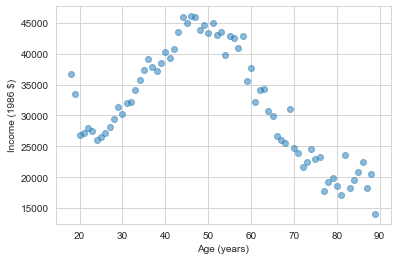

In [300]:
grouped = gss.groupby("age")
mean_income_by_age = grouped["realinc"].mean()

plt.plot(mean_income_by_age,"o",alpha = 0.5)
plt.xlabel("Age (years)")
plt.ylabel("Income (1986 $)")
plt.show()

### 5. Mean income over age

Here's the result. Average income increases from age 20 to age 50, then starts to fall. And that explains why the estimated slope is so small, because the relationship is non-linear. Remember that correlation and simple regression can't measure non-linear relationships. But multiple regression can!

### 6. Adding a quadratic term

To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other variables. As an example, I'll create a new variable called age2 that equals age squared. Now we can run a regression with both age and age2 on the right side. And here are the results. The slope associated with age is substantial, about $1700 per year. The slope associated with age2 is about -17, which is harder to interpret.

In [303]:
gss["age2"] = gss["age"]**2

model = smf.ols("realinc ~ educ + age + age2",data =gss).fit()
model.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

### 7. Whew!

In the next lesson, we'll see methods to visualize regression results. But first, let's practice multiple regression.

## Plot income and education

<p>To get a closer look at the relationship between income and education, let's use the variable <code>'educ'</code> to group the data, then plot mean income in each group.</p>
<p>Here, the GSS dataset has been pre-loaded into a DataFrame called <code>gss</code>.</p>

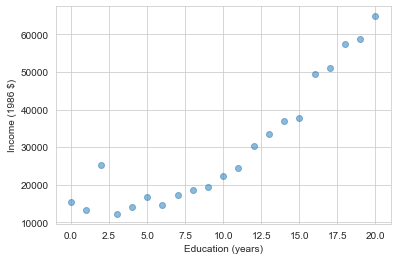

In [307]:
grouped = gss.groupby("educ")
mean_income_by_educ = grouped["realinc"].mean()

plt.plot(mean_income_by_educ,"o",alpha =0.5)
# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()


## Non-linear model of education

<p>The graph in the previous exercise suggests that the relationship between income and education is non-linear.  So let's try fitting a non-linear model.</p>

In [308]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss["educ"]**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols("realinc ~ educ + educ2 + age + age2",data = gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


## Visualizing regression results

### 1. Visualizing regression results

In the previous lesson we ran a multiple regression model to characterize the relationship between income and age. Because the model is non-linear, the parameters are hard to interpret. In this lesson we'll see a way to interpret them visually, and to validate them against data.

### 2. Modeling income and age

Here's the model from the previous exercise. First, we created new variables for educ squared and age squared. Then we ran the regression model with educ, educ2, age, and age2. And here are the results. The parameters are hard to interpret. Fortunately, we don't have to -- sometimes the best way to understand a model is by looking at its predictions rather than its parameters.

### 3. Generating predictions

The regression results object provides a method called predict() that uses the model to generate predictions. It takes a DataFrame as a parameter and returns a Series with a prediction for each row in the DataFrame. To use it, I'll create a new DataFrame with age running from 18 to 85, and age2 set to age squared. Next, I'll pick a level for educ, like 12 years, which is the most common value. When you assign a single value to a column in a DataFrame, Pandas makes a copy for each respondent. Then we can use results to predict the average income for each age group, holding education constant.

In [312]:
df = pd.DataFrame()
df["age"] = np.linspace(start=18,stop=85,num=50)
df["age2"] = df["age"]**2

# keeping the educ as constant to interpet the age
df["educ"] = 12
df["educ2"] = df["educ"] **2


In [313]:
pred12 = results.predict(df)

### 4. Plotting predictions

The result from predict() is a Series with one prediction for each row. So we can plot it like this, with age on the x-axis and the predicted income for each age group on the y-axis. We can plot the data for comparison, like this; recall that we computed mean_income_by_age in the previous lesson. And we should label the axes, as always.

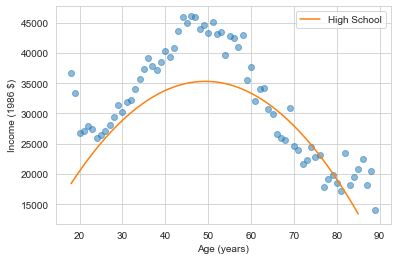

In [315]:
plt.plot(mean_income_by_age,"o",alpha=0.5)
plt.plot(df['age'],pred12,label="High School")


plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

### 5. Comparing with data

Here are the results. The blue dots show the average income in each age group. The orange line shows the predictions generated by the model, holding education constant. This plot shows the shape of the model, a downward-facing parabola.

### 6. Levels of education

We can do the same thing with other levels of education, like 14 years, which is the nominal time to earn an Associate's degree, and 16 years, which is the nominal time to earn a Bachelor's degree.

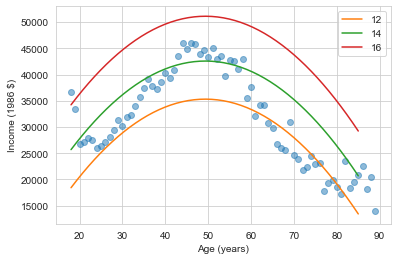

In [317]:
plt.plot(mean_income_by_age,"o",alpha=0.5)
educ_year = [12,14,16]
for year in educ_year:
    df["educ"] = year
    df["educ2"] = df["educ"]**2
    pred = results.predict(df)
    plt.plot(df["age"],pred,label=year)

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()


"### 7. Interpreting the results

And here are the results. The lines show mean income, as predicted by the model, as a function of age, for three levels of education. This visualization helps validate the model since we can compare the predictions with the data. And it helps us interpret the model since we can see the separate contributions of age and education.

### 8. Let's practice!

In the exercises, you'll have a chance to run a multiple regression, generate predictions, and visualize the results. Have fun!

## Making predictions

<p>At this point, we have a model that predicts income using age, education, and sex.</p>
<p>Let's see what it predicts for different levels of education, holding <code>age</code> constant.</p>

In [318]:
# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


## Visualizing predictions

<p>Now let's visualize the results from the previous exercise!</p>

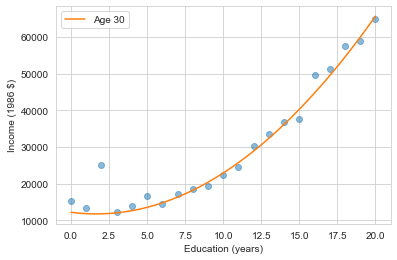

In [320]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ ,"o",alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df["educ"], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## Logistic regression

### 1. Logistic regression

Congratulations on making it this far! I have saved one of my favorite topics for the end - logistic regression.

### 2. Categorical variables

To understand logistic regression, we have to start with categorical variables. Most of the variables we have used so far - like income, age, and education - are numerical. But variables like sex and race are categorical; that is, each respondent belongs to one of a specified set of categories.

### 3. Sex and income

With StatsModels, it is easy to include a categorical variable as part of a regression model. Here's how. In the formula string, the letter C indicates that sex is a categorical variable. And here are the results. The regression treats the value sex=1, which is male, as the default, and reports the difference associated with the value sex=2, which is female. So this result indicates that income for women is about $4100 less than for men, after controlling for age and education.

### 4. Boolean variable

If a categorical variable has only two values, it's called a boolean variable. For example, one of the questions in the General Social Survey asks "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?" The variable is called gunlaw, and here are the values. 1 means yes and 2 means no, so most respondents are in favor. To explore the relationship between this variable and factors like age, sex, and education, we can use logistic regression. StatsModels provides logistic regression, but to use it, we have to recode the variable so 1 means yes and 0 means no. We can do that by replacing 2 with 0. And we can check the results.

### 5. Logistic regression

Now we can run the regression. Instead of ols(), we use logit(), which is named for the logit function, which is related to logistic regression. Other than that, everything is the same as what we have seen before. And here are the results. The parameters are in the form of "log odds", which you may or may not be familiar with. I won't explain them in detail here, except to say that positive values are associated with things that make the outcome more likely; negative values make the outcome less likely. For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form of gun control. To see how much more likely, we can generate and plot predictions, as we did with linear regression.

### 6. Generating predictions

As an example, I'll generate predictions for different ages and sexes, with education held constant. First we need a DataFrame with age and educ. Then we can compute age2 and educ2. We can generate predictions for men like this. And for women like this.

### 7. Visualizing results

Now, to visualize the results, I start by plotting the data. As we've done before, we'll divide the respondents into age groups and compute the mean in each group. The mean of a binary variable is the fraction of people in favor. Now we can plot the predictions, for men and women, as a function of age. And label the axes.

### 8. Gun laws and age

Here's what it looks like. According to the model, people near age 50 are least likely to support gun control (at least as this question was posed). And women are more likely to support it than men, by almost 15 percentage points.

### 9. Let's practice!

Logistic regression is a powerful tool for exploring relationships between a binary variable and the factors that predict it. In the exercises, you'll explore the factors that predict support for legalizing marijuana.

## Predicting a binary variable

<p>Let's use logistic regression to predict a binary variable.  Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.</p>
<p>In the GSS dataset, the variable <code>grass</code> records the answer to the question "Do you think the use of marijuana should be made legal or not?"</p>

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


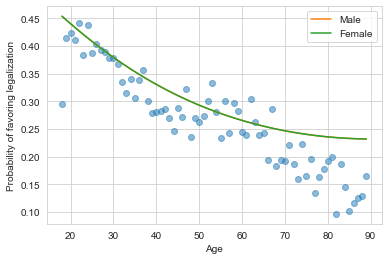

In [321]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()


# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df["age"],pred1,label = "Female")

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()